In [1]:
import sys; sys.path.append('../../')
from definitions import *
from notebooks.nb_imports import *

In [2]:
# Labels and the predictions for a 15 lookback window
labels = load_pickle(ROOT_DIR + '/data/processed/labels/original.pickle')
df = load_pickle(ROOT_DIR + '/data/interim/munged/df.pickle')

/Users/jambo/miniconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


In [3]:
cols = ['HepaticSOFA', 'SIRS', 'SIRS_path', 'MEWS', 'qSOFA', 'SOFA', 'SepticShock']

# Derived sepsis scores

## SOFA

**There is a clear increase in the ratio of ones to SOFA score for larger scores**

> qSofa and SepticShock condtions also correlated, but not as strongly

In [4]:
def plot_ones_to_entries_ratio_for_each_val(df, labels, col, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Get the ratio of num_ones to total entries
    ratios = [labels[df[col] >= i].sum() / df[df[col] >= i].shape[0] for i in range(df[col].max() + 1)]
    
    # Plot
    ax.plot(range(df[col].max() + 1), ratios, label=col)
    ax.set_title('Num ones/Total num things for {}'.format(col), fontweight='bold', fontsize=18)

KeyError: 'qSOFA'

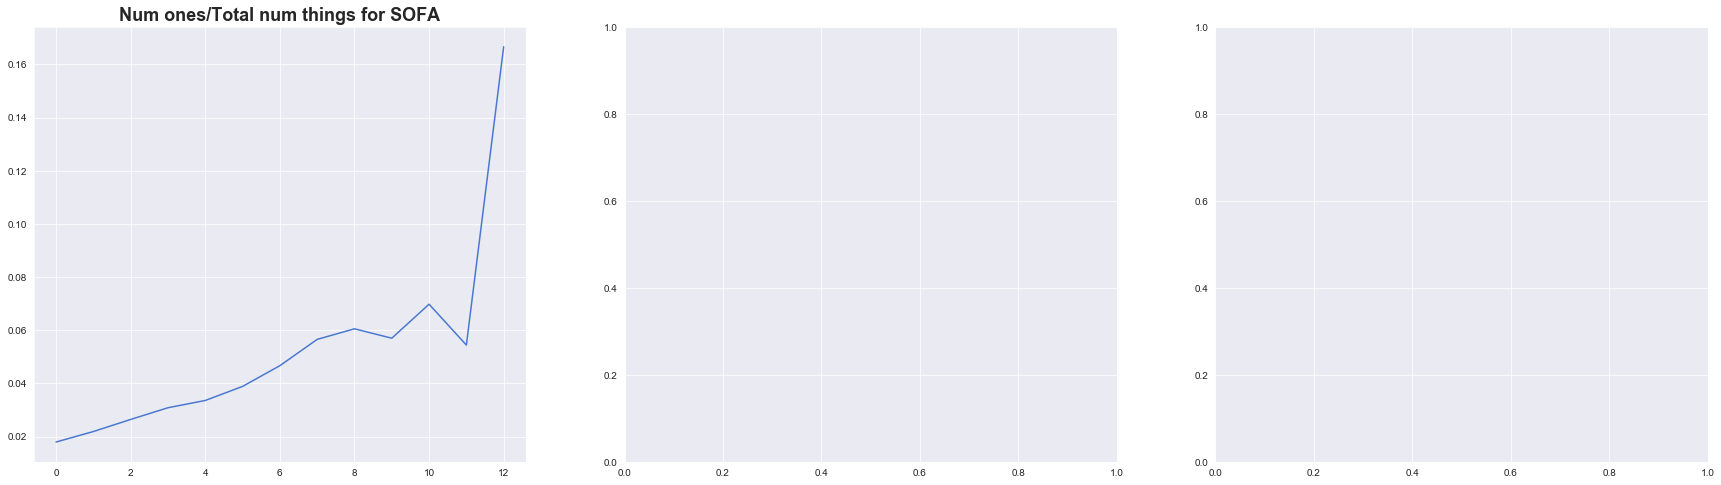

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
ax = ax.ravel()

plot_ones_to_entries_ratio_for_each_val(df, labels, 'SOFA', ax=ax[0])
plot_ones_to_entries_ratio_for_each_val(df, labels, 'qSOFA', ax=ax[1])
plot_ones_to_entries_ratio_for_each_val(df, labels, 'SepticShock', ax=ax[2])

for x in ax:
    x.tick_params(axis='both', which='major', labelsize=16)

**qSOFA and SOFA**

In [6]:
ratios = [labels[(df['SOFA'] >= i) & (df['qSOFA'] >= 1)].sum() / df[df['SOFA'] >= i].shape[0] for i in range(df['SOFA'].max() + 1)]
plt.plot(range(df['SOFA'].max() + 1), ratios)

KeyError: 'qSOFA'

## SOFA deterioration

In [7]:
ratios = [labels[(df['SOFA_deterioration'] >= i)].sum() / df[df['SOFA_deterioration'] >= i].shape[0] for i in range(int(df['SOFA_deterioration'].max()) + 1)]
plt.plot(range(int(df['SOFA_deterioration'].max()) + 1), ratios)

KeyError: 'SOFA_deterioration'

## SIRS

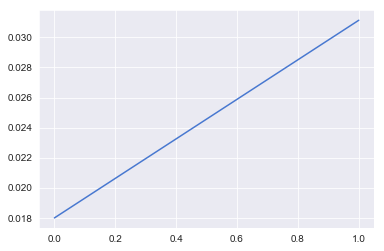

In [9]:
ratios = [labels[df['SIRS'] >= i].sum() / df[df['SIRS'] >= i].shape[0] for i in range(df['SIRS'].max() + 1)]
plt.plot(range(df['SIRS'].max() + 1), ratios)

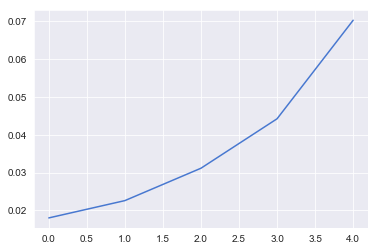

In [10]:
ratios = [labels[df['SIRS_path'] >= i].sum() / df[df['SIRS_path'] >= i].shape[0] for i in range(df['SIRS_path'].max() + 1)]
plt.plot(range(df['SIRS_path'].max() + 1), ratios)

## MEWS

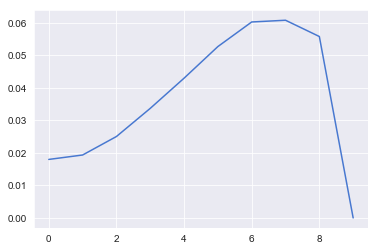

In [11]:
ratios = [labels[df['MEWS'] >= i].sum() / df[df['MEWS'] >= i].shape[0] for i in range(df['MEWS'].max() + 1)]
plt.plot(range(df['MEWS'].max() + 1), ratios)

# All sepsis 3 scores
If someone has the following:

> qSOFA >= 2

> SOFA >=2

and also for shock:

> SepticShock = 2

In [15]:
det = labels[df['SOFA_deterioration'] < 2]
det[det > 0].sum()

21818

# A calculation of PaO2/FiO2

In [4]:
PaO2 = (df['FiO2'] * (760 - 47)) - (df['PaCO2'] / 0.8)

In [5]:
from copy import deepcopy
pf = PaO2 / df['FiO2']
df['SOFA_new'] = deepcopy(df['SOFA'])
df['SOFA_new'][pf >= 400] += 0
df['SOFA_new'][(pf < 400) & (pf >= 300)] += 1
df['SOFA_new'][(pf < 300) & (pf >= 200)] += 2
df['SOFA_new'][(pf < 200) & (pf >= 100)] += 3
df['SOFA_new'][pf < 100] += 4

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [7]:
a = pd.Series(index=df.index, data=0)

a[pf >= 400] += 0
a[(pf < 400) & (pf >= 300)] += 1
a[(pf < 300) & (pf >= 200)] += 2
a[(pf < 200) & (pf >= 100)] += 3
a[pf < 100] += 4


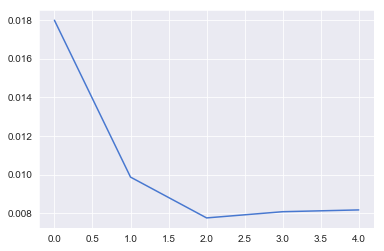

In [8]:
ratios = [labels[a >= i].sum() / df[a >= i].shape[0] for i in range(int(a.max()) + 1)]

plt.plot(range(int(a.max()) + 1), ratios)